<div style='background-image: url("../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Introduction to File Formats and read/write in ObsPy</div>
        </div>
    </div>
</div>

Seismo-Live: http://seismo-live.org

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))
---

![](images/obspy_logo_full_524x179px.png)

This is oftentimes not taught, but fairly important to understand, at least at a basic level. This also teaches you how to work with these in ObsPy.

**This notebook aims to give a quick introductions to ObsPy's core functions and classes. Everything here will be repeated in more detail in later notebooks.**

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

## SEED Identifiers

According to the  [SEED standard](www.fdsn.org/seed_manual/SEEDManual_V2.4.pdf), which is fairly well adopted, the following nomenclature is used to identify seismic receivers:

* **Network code**: Identifies the network/owner of the data. Assigned by the FDSN and thus unique.
* **Station code**: The station within a network. *NOT UNIQUE IN PRACTICE!* Always use together with a network code!
* **Location ID**: Identifies different data streams within one station. Commonly used to logically separate multiple instruments at a single station.
* **Channel codes**: Three character code: 1) Band and approximate sampling rate, 2) The type of instrument, 3) The orientation

This results in full ids of the form **NET.STA.LOC.CHAN**, e.g. **IV.PRMA..HHE**.


---


In seismology we generally distinguish between three separate types of data:

1. **Waveform Data** - The actual waveforms as time series.
2. **Station Data** - Information about the stations' operators, geographical locations, and the instrument's responses.
3. **Event Data** - Information about earthquakes.

Some formats have elements of two or more of these.

## Waveform Data

![stream](images/Stream_Trace.svg)

There are a myriad of waveform data formats but in Europe and the USA two formats dominate: **MiniSEED** and **SAC**


### MiniSEED

* This is what you get from datacenters and also what they store, thus the original data
* Can store integers and single/double precision floats
* Integer data (e.g. counts from a digitizer) are heavily compressed: a factor of 3-5 depending on the data
* Can deal with gaps and overlaps
* Multiple components per file
* Contains only the really necessary parameters and some information for the data providers

In [2]:
import obspy

# ObsPy automatically detects the file format.
st = obspy.read("data/example.mseed")
print(st)

# Fileformat specific information is stored here.
print(st[0].stats.mseed)

6 Trace(s) in Stream:
IV.BDI..BHE | 2014-04-04T01:33:37.045000Z - 2014-04-04T02:15:10.695000Z | 20.0 Hz, 49874 samples
IV.BDI..BHE | 2014-04-04T02:15:23.535000Z - 2014-04-04T03:08:04.485000Z | 20.0 Hz, 63220 samples
IV.BDI..BHN | 2014-04-04T01:33:43.975000Z - 2014-04-04T02:15:12.125000Z | 20.0 Hz, 49764 samples
IV.BDI..BHN | 2014-04-04T02:15:22.725000Z - 2014-04-04T03:08:10.025000Z | 20.0 Hz, 63347 samples
IV.BDI..BHZ | 2014-04-04T01:33:26.745000Z - 2014-04-04T02:15:11.195000Z | 20.0 Hz, 50090 samples
IV.BDI..BHZ | 2014-04-04T02:15:24.025000Z - 2014-04-04T03:08:16.825000Z | 20.0 Hz, 63457 samples
AttribDict({'filesize': 374272, 'record_length': 512, 'encoding': 'STEIM2', 'byteorder': '>', 'dataquality': 'D', 'number_of_records': 731})


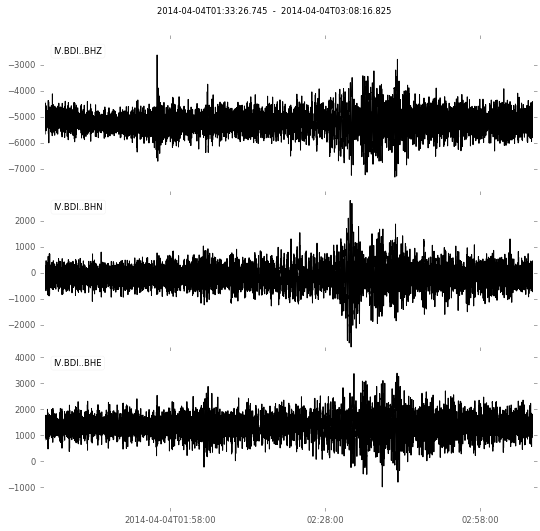

In [3]:
st.plot()

2 Trace(s) in Stream:
IV.BDI..BHZ | 2014-04-04T01:33:26.745000Z - 2014-04-04T02:15:11.195000Z | 20.0 Hz, 50090 samples
IV.BDI..BHZ | 2014-04-04T02:15:24.025000Z - 2014-04-04T03:08:16.825000Z | 20.0 Hz, 63457 samples


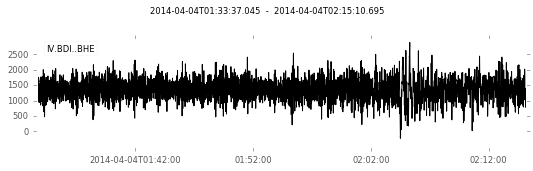

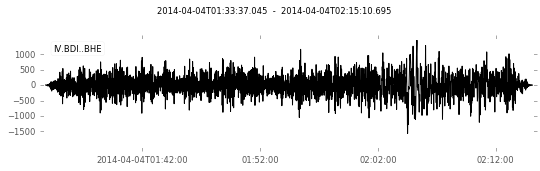

In [4]:
# This is a quick interlude to teach you basics about how to work
# with Stream/Trace objects.

# Most operations work in-place, e.g. they modify the existing
# objects. We'll create a copy here.
st2 = st.copy()

# To use only part of a Stream, use the select() function.
print(st2.select(component="Z"))

# Stream objects behave like a list of Trace objects.
tr = st2[0]

tr.plot()

# Some basic processing. Please note that these modify the
# existing object.
tr.detrend("linear")
tr.taper(type="hann", max_percentage=0.05)
tr.filter("lowpass", freq=0.5)

tr.plot()

In [5]:
# You can write it again by simply specifing the format.
st.write("temp.mseed", format="mseed")

### SAC

* Custom format of the `sac` code.
* Simple header and single precision floating point data.
* Only a single component per file and no concept of gaps/overlaps.
* Used a lot due to `sac` being very popular and the additional basic information that can be stored in the header.

In [6]:
st = obspy.read("data/example.sac")
print(st)
st[0].stats.sac.__dict__

1 Trace(s) in Stream:
AI.BELA..BHN | 2010-03-11T06:17:18.000000Z - 2010-03-11T08:02:18.000000Z | 20.0 Hz, 126001 samples


{'b': 0.0,
 'cmpaz': 0.0,
 'cmpinc': 90.0,
 'delta': 0.050000001,
 'e': 6300.0,
 'idep': 5,
 'iftype': 1,
 'internal0': 2.0,
 'kcmpnm': 'BHN     ',
 'kevnm': '        ',
 'khole': '        ',
 'knetwk': 'AI      ',
 'kstnm': 'BELA    ',
 'lcalda': 1,
 'leven': 1,
 'lpspol': 0,
 'nevid': 0,
 'norid': 0,
 'npts': 126001,
 'nvhdr': 6,
 'nzhour': 6,
 'nzjday': 70,
 'nzmin': 17,
 'nzmsec': 0,
 'nzsec': 18,
 'nzyear': 2010,
 'stdp': 0.0,
 'stel': 262.0,
 'stla': -77.875,
 'stlo': -34.6269,
 'unused23': 0}

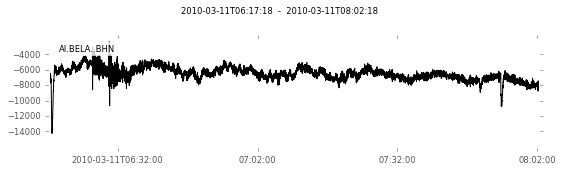

In [7]:
st.plot()

In [8]:
# You can once again write it with the write() method.
st.write("temp.sac", format="sac")

## Station Data

![inv](images/Inventory.svg)

Station data contains information about the organziation that collections the data, geographical information, as well as the instrument response. It mainly comes in three formats:

* `(dataless) SEED`: Very complete but pretty complex and binary. Still used a lot, e.g. for the Arclink protocol
* `RESP`: A strict subset of SEED. ASCII based. Contains **ONLY** the response.
* `StationXML`: Essentially like SEED but cleaner and based on XML. Most modern format and what the datacenters nowadays serve. **Use this if you can.**


ObsPy can work with all of them but today we will focus on StationXML.

They are XML files:

In [9]:
!head data/all_stations.xml

<?xml version="1.0" encoding="UTF-8"?>
<FDSNStationXML xmlns="http://www.fdsn.org/xml/station/1" schemaVersion="1.0">
  <Source>SeisComP3</Source>
  <Sender>INGV</Sender>
  <Created>2015-05-13T23:31:49</Created>
  <Network code="IV" startDate="1980-01-01T00:00:00" restrictedStatus="open">
    <Description>Italian Seismic Network</Description>
    <Station code="BDI" startDate="2003-03-01T00:00:00" restrictedStatus="open">
      <Latitude>44.06238</Latitude>
      <Longitude>10.59698</Longitude>


In [10]:
import obspy

# Use the read_inventory function to open them.
inv = obspy.read_inventory("data/all_stations.xml")
print(inv)

Inventory created at 2015-05-13T23:31:49.000000Z
	Sending institution: SeisComP3 (INGV)
	Contains:
		Networks (3):
			IV
			MN
			SI
		Stations (9):
			IV.BDI (BAGNI DI LUCCA)
			IV.BOB (BOBBIO)
			IV.CAVE (CAVE)
			IV.PESA (PESARO)
			IV.PRMA (Parma)
			IV.SALO (Salo)
			IV.TEOL (Teolo)
			MN.VLC (Villacollemandina, Italy)
			SI.LUSI (Lusi)
		Channels (47):
			IV.BDI..BHE, IV.BDI..BHN, IV.BDI..BHZ, IV.BDI..HHE, IV.BDI..HHN,
			IV.BDI..HHZ, IV.BOB..BHE, IV.BOB..BHN, IV.BOB..BHZ, IV.BOB..HHE,
			IV.BOB..HHN, IV.BOB..HHZ, IV.CAVE..HHE, IV.CAVE..HHN, IV.CAVE..HHZ,
			IV.PESA..BHE, IV.PESA..BHN, IV.PESA..BHZ, IV.PESA..HHE,
			IV.PESA..HHN, IV.PESA..HHZ, IV.PRMA..BHE, IV.PRMA..BHN,
			IV.PRMA..BHZ, IV.PRMA..HHE, IV.PRMA..HHN, IV.PRMA..HHZ,
			IV.SALO..BHE, IV.SALO..BHN, IV.SALO..BHZ, IV.SALO..HHE,
			IV.SALO..HHN, IV.SALO..HHZ, IV.TEOL..BHE, IV.TEOL..BHN,
			IV.TEOL..BHZ, IV.TEOL..HHN, IV.TEOL..HHZ, MN.VLC..BHE, MN.VLC..BHN,
			MN.VLC..BHZ, MN.VLC..HHE, MN.VLC..HHN, MN.VLC..HHZ, SI.LUSI..HH

You can see that they can contain an arbirary number of networks, stations, and channels.

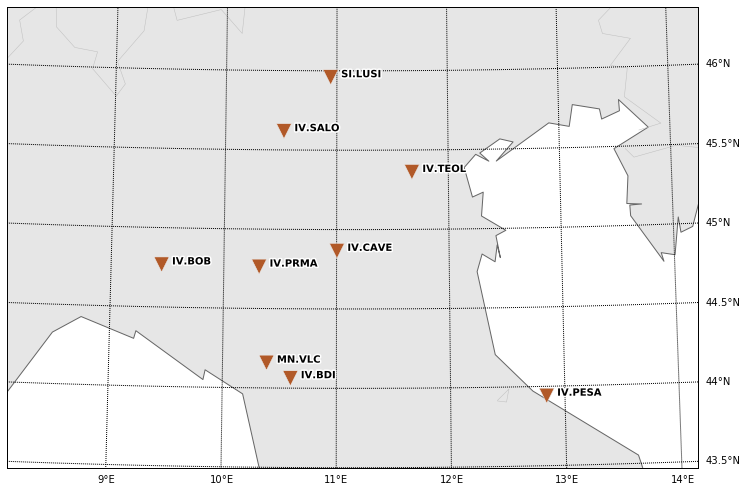

In [11]:
# ObsPy is also able to plot a map of them.
inv.plot(projection="local");

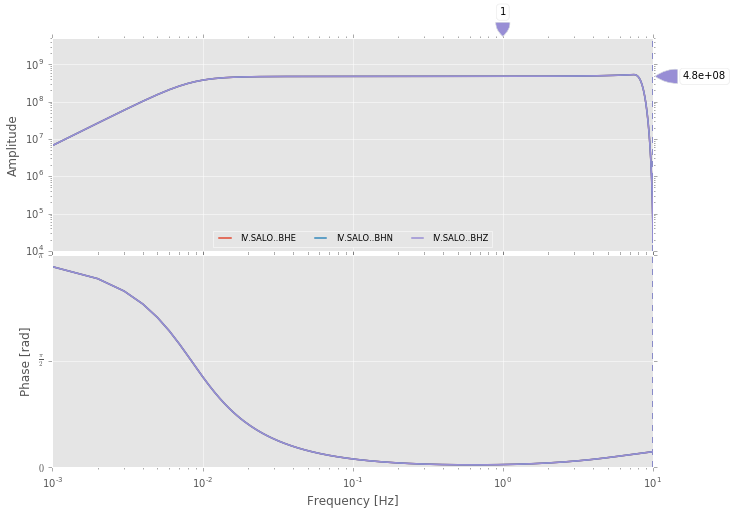

In [12]:
# As well as a plot the instrument response.
inv.select(network="IV", station="SALO", channel="BH?").plot_response(0.001);

In [13]:
# Coordinates of single channels can also be extraced. This function
# also takes a datetime arguments to extract information at different
# points in time.
inv.get_coordinates("IV.SALO..BHZ")

{'elevation': 600.0,
 'latitude': 45.6183,
 'local_depth': 1.0,
 'longitude': 10.5243}

In [14]:
# And it can naturally be written again, also in modified state.
inv.select(channel="BHZ").write("temp.xml", format="stationxml")

## Event Data

![events](./images/Event.svg)

Event data is essentially served in either very simple formats like NDK or the CMTSOLUTION format used by many waveform solvers:

In [15]:
!cat data/GCMT_2014_04_01__Mw_8_1

PDEW 2014  4  1 23 46 47.30 -19.6100  -70.7700  25.0 0.0 8.2 NEAR COAST OF NORTHERN C
event name:     201404012346A
time shift:     44.2000
half duration:  28.0000
latitude:      -19.7000
longitude:     -70.8100
depth:          21.6000
Mrr:       9.200000e+27
Mtt:      -3.900000e+26
Mpp:      -8.810000e+27
Mrt:       6.370000e+27
Mrp:      -1.530000e+28
Mtp:       2.050000e+27


Datacenters on the hand offer **QuakeML** files, which are surprisingly complex in structure but can store complex relations.

In [16]:
# Read QuakeML files with the read_events() function.
cat = obspy.read_events("data/GCMT_2014_04_01__Mw_8_1.xml")
print(cat)

1 Event(s) in Catalog:
2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1 Mwc


In [17]:
print(cat[0])

Event:	2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1 Mwc

	        resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=4597319")
	         event_type: 'earthquake'
	---------
	 event_descriptions: 1 Elements
	   focal_mechanisms: 1 Elements
	            origins: 2 Elements
	         magnitudes: 1 Elements


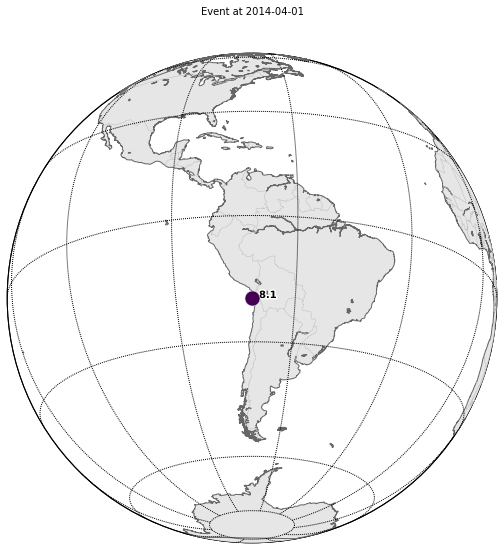

In [18]:
cat.plot(projection="ortho");

In [19]:
# Once again they can be written with the write() function.
cat.write("temp_quake.xml", format="quakeml")

To show off some more things, I added a file containing all events from 2014 in the GCMT catalog.

In [20]:
import obspy

cat = obspy.read_events("data/2014.ndk")

print(cat)

2463 Event(s) in Catalog:
2014-04-01T01:59:46.300000Z | -34.990, -108.410 | 4.79 Mwc
2014-04-01T05:05:57.500000Z | +48.940, -129.570 | 5.07 Mwc
...
2014-09-30T22:34:31.500000Z | -17.850, -178.590 | 5.46 Mwc
2014-09-30T23:23:01.500000Z | +56.740,  -34.460 | 4.91 Mwc
To see all events call 'print(CatalogObject.__str__(print_all=True))'


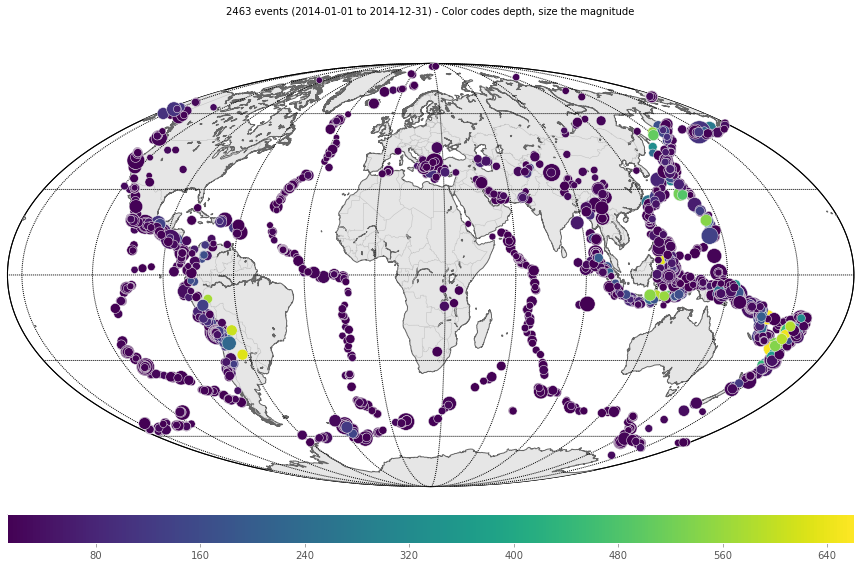

In [21]:
cat.plot();

In [22]:
cat.filter("depth > 100000", "magnitude > 7")

2 Event(s) in Catalog:
2014-06-23T20:53:33.700000Z | +52.000, +178.430 | 7.92 Mwc
2014-11-01T18:57:29.900000Z | -19.760, -177.610 | 7.11 Mwc